In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path = "../outputs/metrics/resunet_metrics.csv"   # change to your path
df = pd.read_csv(csv_path)

In [3]:
df


,epoch,train_loss,val_loss,val_dice,val_iou,val_accuracy
0,0,0.2333,0.2526,0.7945,0.7351,0.9757
1,1,0.1641,0.2026,0.8017,0.7473,0.9784
2,2,0.1440,0.1466,0.8210,0.7665,0.9784
3,3,0.1224,0.1675,0.8092,0.7470,0.9742
4,4,0.1135,0.1261,0.8425,0.7904,0.9799
5,5,0.1126,0.1198,0.8479,0.7969,0.9811
6,6,0.1025,0.1258,0.8422,0.7861,0.9788
7,7,0.0978,0.0986,0.8805,0.8342,0.9836
8,8,0.0992,0.1019,0.8729,0.8262,0.9812
9,9,0.0954,0.1115,0.8689,0.8209,0.9822


In [4]:
df["epoch"] = df["epoch"].astype(int)
df = df.sort_values("epoch").reset_index(drop=True)


In [5]:
best_idx = df["val_iou"].idxmax()
best_row = df.loc[best_idx]
print("Best epoch (by Val IoU):", int(best_row["epoch"]))
print(best_row)

Best epoch (by Val IoU): 19
epoch           19.0000
train_loss       0.0702
val_loss         0.0882
val_dice         0.8863
val_iou          0.8429
val_accuracy     0.9854
Name: 19, dtype: float64


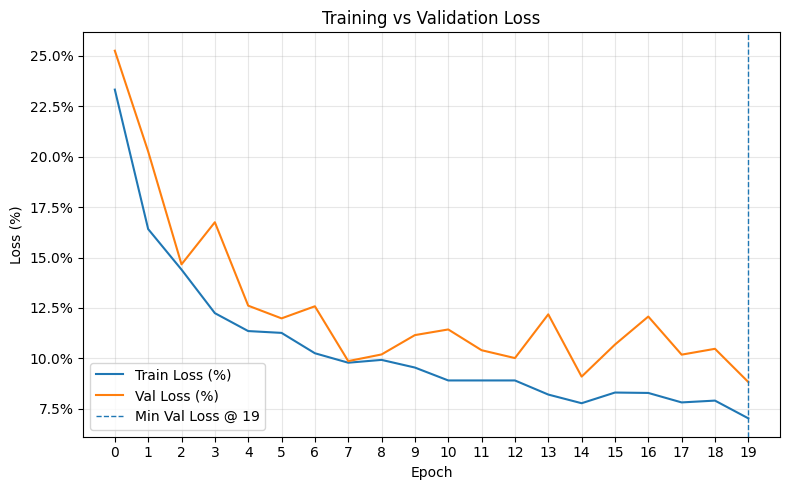

In [23]:

from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["train_loss"] * 100, label="Train Loss (%)")
plt.plot(df["epoch"], df["val_loss"] * 100, label="Val Loss (%)")

# ---- best epoch (minimum val loss) ----
best_val_epoch = df.loc[df["val_loss"].idxmin(), "epoch"]
plt.axvline(
    best_val_epoch,
    linestyle="--",
    linewidth=1,
    label=f"Min Val Loss @ {best_val_epoch}"
)

plt.xlabel("Epoch")
plt.ylabel("Loss (%)")
plt.title("Training vs Validation Loss")

# Integer epochs
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))

# Percentage formatting ONLY (no forced limits)
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


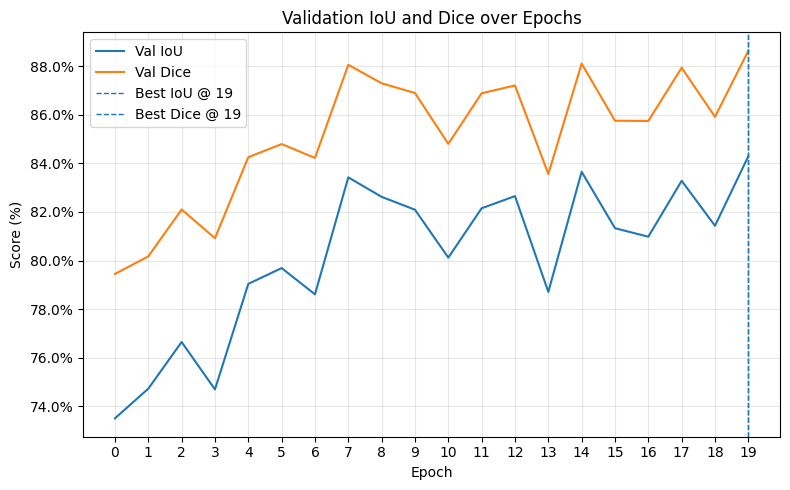

In [11]:
plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["val_iou"], label="Val IoU")
plt.plot(df["epoch"], df["val_dice"], label="Val Dice")

best_iou_epoch = df.loc[df["val_iou"].idxmax(), "epoch"]
best_dice_epoch = df.loc[df["val_dice"].idxmax(), "epoch"]

plt.axvline(best_iou_epoch, linestyle="--", linewidth=1, label=f"Best IoU @ {best_iou_epoch}")
plt.axvline(best_dice_epoch, linestyle="--", linewidth=1, label=f"Best Dice @ {best_dice_epoch}")

plt.xlabel("Epoch")
plt.ylabel("Score (%)")
plt.title("Validation IoU and Dice over Epochs")

# ---- FIXES ----
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
# ----------------

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


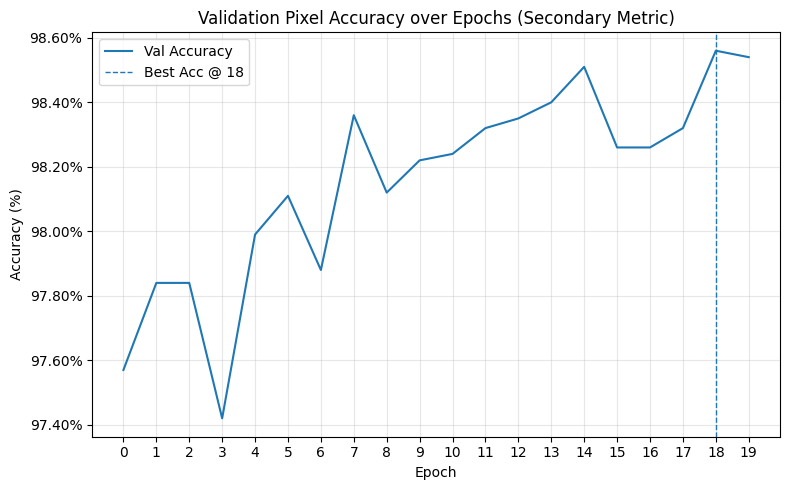

In [25]:

from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 5))

plt.plot(df["epoch"], df["val_accuracy"], label="Val Accuracy")

# ---- best epoch (maximum accuracy) ----
best_acc_epoch = df.loc[df["val_accuracy"].idxmax(), "epoch"]
plt.axvline(
    best_acc_epoch,
    linestyle="--",
    linewidth=1,
    label=f"Best Acc @ {best_acc_epoch}"
)

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Validation Pixel Accuracy over Epochs (Secondary Metric)")

# ---- FIXES ----
plt.xticks(np.arange(df["epoch"].min(), df["epoch"].max() + 1, 1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
# ----------------

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
